In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\cisplatin_integrated.csv')
data.head(2)

,Cell names,WASH7P,FAM138F,LOC729737,RPL23AP21,CICP7,CICP3,LOC101060494,LINC00115,LINC01128,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cisplatin
0,BR:MDA-MB-231,-0.386,0.786,0.931,-0.086,-0.508,0.744,-0.364,-0.510,-0.078,...,0.026098,0.029986,0.025863,0.053371,0.038207,0.02327,0.030655,0.040250,MDAMB231,1.411583
1,BR:HS 578T,-0.585,0.021,-0.801,-0.795,-0.499,0.720,-1.207,0.098,0.823,...,0.021282,0.024981,0.013982,0.054200,0.029125,0.01075,0.015981,0.035154,HS578T,1.572590


In [3]:
target = data.pop('Cisplatin')
X = data.select_dtypes('float64')

In [4]:
target.shape, X.shape

((49,), (49, 27221))

In [5]:
X.head(2)

,WASH7P,FAM138F,LOC729737,RPL23AP21,CICP7,CICP3,LOC101060494,LINC00115,LINC01128,TUBB8P11,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,-0.386,0.786,0.931,-0.086,-0.508,0.744,-0.364,-0.510,-0.078,-0.045,...,0.058283,0.031639,0.026098,0.029986,0.025863,0.053371,0.038207,0.02327,0.030655,0.040250
1,-0.585,0.021,-0.801,-0.795,-0.499,0.720,-1.207,0.098,0.823,1.923,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.01075,0.015981,0.035154


In [6]:
scaler = StandardScaler()
X = pd.DataFrame(data = scaler.fit_transform(X), columns = X.columns)
X.head(2)

,WASH7P,FAM138F,LOC729737,RPL23AP21,CICP7,CICP3,LOC101060494,LINC00115,LINC01128,TUBB8P11,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,-0.283205,0.867589,1.129076,0.042324,-0.576742,0.909919,-0.385326,-0.533423,-0.047319,-0.079371,...,-0.905850,0.116323,-0.005360,-0.511451,0.115667,-1.131388,0.599451,0.018875,-0.108863,0.225088
1,-0.480597,0.055057,-0.786070,-0.742288,-0.567832,0.881857,-1.244896,0.430940,0.991509,2.151450,...,-0.742129,-0.408495,-0.681766,-1.051444,-1.706819,-1.059985,-0.412471,-1.667947,-1.435317,-0.274465


In [7]:
from sklearn.preprocessing import LabelEncoder

y = []
drug_mean = target.mean()
for i in list(target):
    if i > drug_mean:
        y.append('NR')
    else:
        y.append('R')
        
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [8]:
y.value_counts()

0    36
1    13
dtype: int64

In [9]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [10]:
X.fillna(value='0.0', inplace=True)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X,y = smote.fit_resample(X,y)

y.value_counts()

1    36
0    36
dtype: int64

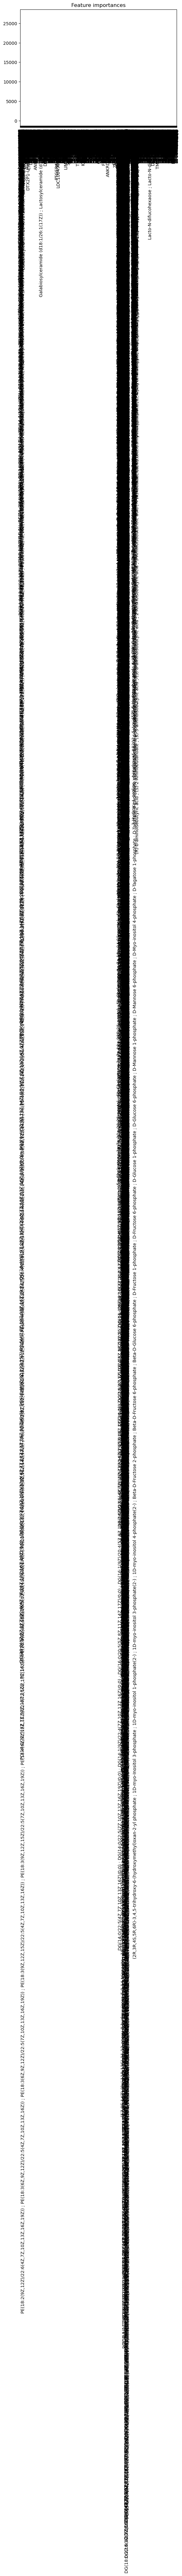

In [12]:
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

sfm = SelectFromModel(model, threshold = 0.002)
sfm.fit(X, y)

X = pd.DataFrame(data = sfm.transform(X), columns = X.columns[sfm.get_support(1)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state=42)

model.fit(X_train, y_train)
prediction = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, model.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, model.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.875
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.75      0.86        12

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



In [14]:
len(X_train.columns)

183

Text(50.722222222222214, 0.5, 'True Labels')

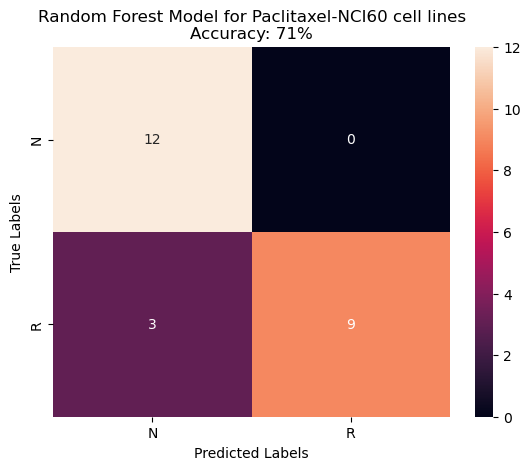

In [15]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Model for Paclitaxel-NCI60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

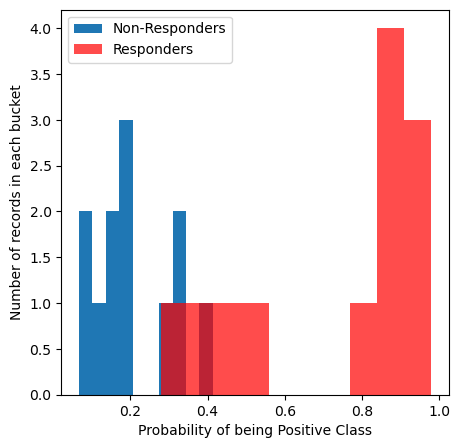

In [16]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [17]:
responders = prediction[y_test == 1]
count = 0
for i in responders: 
    if i > max(prediction[y_test == 0]):
        count+=1
count, count/len(responders)

(10, 0.8333333333333334)

In [27]:
max(responders)

0.98

In [18]:
x = 0
for i in responders:
    if i == 1.0:
        x += 1
x

0

In [19]:
max(prediction[y_test == 0])

0.41333333333333333

In [20]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)
model2.fit(X_train, y_train)
prediction2 = model2.predict_proba(X_test)[:, 1]
y_pred = model2.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(y_train, model2.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, model2.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.83      0.91        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



Text(50.722222222222214, 0.5, 'True labels')

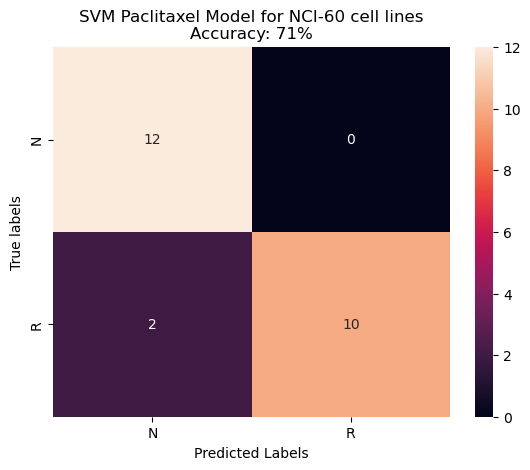

In [21]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Paclitaxel Model for NCI-60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True labels')

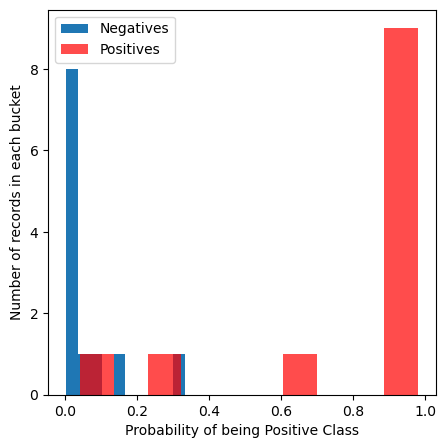

In [22]:
plt.figure(figsize=(5,5))
plt.hist(prediction2[y_test==0], label='Negatives')
plt.hist(prediction2[y_test==1], label='Positives', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [23]:
resp_svm = prediction2[y_test == 1]
count = 0
for i in resp_svm:
    if i > max(prediction2[y_test == 0]):
        count+=1
count, count/len(resp_svm)

(10, 0.8333333333333334)

In [24]:
max(prediction2[y_test == 0])

0.33270467386721186

In [26]:
x = 0
for i in resp_svm:
    if i == 1.0:
        x += 1
x

0

In [28]:
max(resp_svm)

0.9795139410670923

In [25]:
for i in list(X_train.columns):
    print(i)

PERM1
MXRA8
MRPL20
CASP9
RSC1A1
UBR4
PFN1P10
NCMAP
MECR
SPOCD1
RBBP4
LOC100127947
BCAR3
RPS3AP12
PYGO2
PIGM
SELL
PFN1P1
RABGAP1L
MRPS14
DYRK3
MAPKAPK2
UBBP2
CAPN2
SLC35F3
VN1R17P
LOC647077
LOC729348
CD8B
IGK
TFCP2L1
PROC
SCN7A
LOC100507554
TNP1
CMTM8
KRT18P15
MAP4
NFKBIZ
LOC100421439
LOC100507556
NCEH1
LPP
RPL7AP29
LOC100128651
MESTP3
GABRA2
ZAR1
DANCR
NAP1L5
GPRIN3
PGRMC2
SEMA5A
SNHG18
SLC1A3
RPS3AP20
ITK
LINC00243
HIST1H4D
CFB
CYP21A2
ARMC12
DNAH8
ENPP5
PM20D2
SOBP
LOC100288712
NDUFA4
STK31
LOC728524
TMEM60
C7orf62
LRRD1
HYAL4
PARP12
DNAJB6
LOC401442
MTMR9
SLC35G5
FBXO16
FZD3
LINC01606
MYBL1
LOC100506538
FAM135B
PTK2
RFX3
ZBTB5
TBC1D2
MIR32
TTLL11-IT1
TBC1D13
PITRM1
OPTN
SEPT7P9
RSU1P1
HMGN2P8
IFIT3
XPNPEP1
NKX6-2
TRPM5
PGAP2
OR51E2
OR51B4
TUB
RNF141
SLC39A13
DTX4
RAB3IL1
B4GALNT3
LOC100130582
LRP6
AMN1
ENDOU
GSTP1P1
NAV3
DCN
SPIC
RPL21
AKR1B1P4
RPL21P110
STK24
FGF14-AS2
MCF2L
CHAMP1
CDH24
SYF2P1
RPS6KL1
TRNASUP6P
RPL3P4
LOC283701
GPR176
PML
LMAN1L
ANKRD34C-AS1
SYNM
DNM1P46
LOC100130